In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")

In [3]:
train['Label'].replace(['Excellent',"good","fair","bad"],[1,2,3,4] , inplace = True)
val['Label'].replace(['Excellent',"good","fair","bad"],[1,2,3,4] , inplace = True)

<AxesSubplot: >

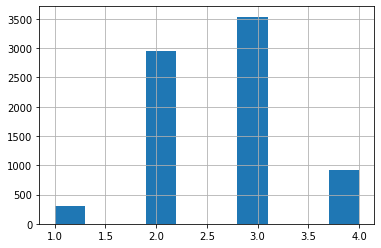

In [4]:
x = np.arange(-100,0,0.5)

train = train.replace(x,np.nan, inplace = False)
train1 = train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
train1.shape[0]

X_train = train1.drop(["id","Label"], axis = 1)
y_train = train1["Label"]

y_train.hist()

6200


<AxesSubplot: >

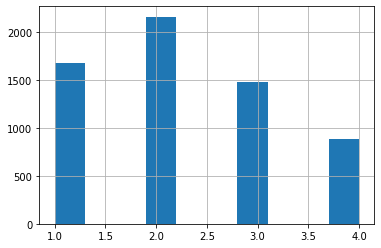

In [12]:
val = val.replace(x,np.nan, inplace = False)
val1 = val.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(val1.shape[0])

X_val = val1.drop(["id","Label"], axis = 1)
y_val = val1["Label"]
val1['Label'].hist()

In [13]:
X = pd.concat([X_train,X_val ],axis=0)
y= pd.concat([y_train, y_val],axis=0)

In [15]:
y

0       2
3       3
4       3
5       4
6       2
       ..
6195    3
6196    2
6197    1
6198    2
6199    2
Name: Label, Length: 13900, dtype: int64

<AxesSubplot: >

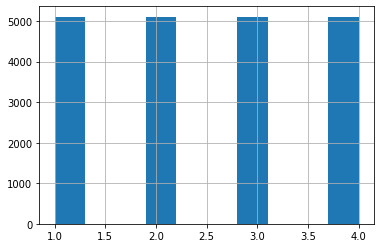

In [16]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

y.hist()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 100,max_features = 30)
scores = cross_val_score(randomForestModel,X,y,cv = 7,scoring = 'accuracy')

randomForestModel.fit(X, y)
pred=randomForestModel.predict(X_val)
print(randomForestModel.score(X_train, y_train))
print(randomForestModel.score(X_val,y_val))

1.0
1.0


In [20]:
scores

array([0.76764907, 0.76688378, 0.83647583, 0.8950977 , 0.91429551,
       0.91772369, 0.9026397 ])

In [21]:
test = test.drop(["id"],axis =1)
test_RF = test 

In [23]:
y_pred = randomForestModel.predict(test_RF)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["Label"])
y_pred_pd = y_pred_pd.reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)